# PHASE 1 PROJECT - Aviation Risk Analysis & Recommendations

## Introduction
As the company is seeking to diversify its portfolio through expansion into commercial and private aviation, it is impotrant to have a deep understanding of operational risks. Using the accident data from the National Transportation Safety Board, this project evaluates the safety records of various aircraft manufacturesrs and models from 1962 to 2023. I will explore the data to determine the lowest risk options available. This will inform actionable recommendations to stakeholders to acquire safe and reliable fleet.

## Business Understanding
1. Problem Statement
The primary challenge is that the company lacks internal expertise regarding the safety profiles and potential risks associated with different types of aircraft. Investing in high-risk aircraft could lead to financial loss, legal liability, reputational damage, and loss of life. The company needs to know which aircraft present the lowest risk to ensure the safety of operations and the viability of the new business unit.

2. Main Objective
The goal of this analysis is to determine which aircraft manufacturers and models have the lowest risk profile to support the company's new business endeavor.

- Analyzing historical aviation accident data to identify trends in safety.
- Evaluating risk based on key factors such as aircraft make, engine type, and phase of flight.
- Providing three concrete, actionable recommendations to the head of the new aviation division to guide their purchasing decisions.

4. Stakeholders
Primary Stakeholder: Head of the new Aviation Division.
Secondary Stakeholders: Executive Board, Investors, and potential future passengers/clients who rely on the company's commitment to safety.

5. Data Source
The analysis utilizes the National Transportation Safety Board (NTSB) Aviation Accident Dataset, which contains information on civil aviation accidents and selected incidents within the United States and international waters from 1962 to 2023. This comprehensive dataset allows for a robust assessment of long-term safety trends and specific incident causes.

---

## Data Understanding
#### Data source
The dataset for this analysis is sourved from **National Transportation Safety Board, that covers aviation accidents and incidents involving aircrafts in the United States and international waters from 1962 to 2023.
This data serves as a reliable sourve to determine aircraft safety records.

#### Data Schema
The dataset includes tens of thousands of records, where each row represents a single aviation accident or incident.
Each record contains information about:
- The aircraft (type, category, manufacturer, model)
- The event (date, location, purpose of flight)
- The environment (weather, light conditions)
- The outcome (injuries, fatalities, damage level)
This makes the dataset comprehensive enough to evaluate both accident frequency and accident severity across aircraft types.

#### Data Strategy
The relevant columns include:
- Make
- Model
- Aircraft.Category
- Broad.Phase.of.Flight
- Weather.Condition
- Number.of.Engines
- Total.Fatal.Injuries
- Total.Serious.Injuries
- Total.Minor.Injuries
- Total_Uninjured
- Aircraft.Damage
- Purpose.of.flight
- Event.Date

#### Data Quality
##### Missing Values
- Some older records (1960s–1980s) may lack detail
- Certain columns may have missing values (None) that may need to be filled or droped.
- Weather and light condition fields frequently contain “Unknown”
##### Inconsistent Values
Since the data set is based on a large period, certain values may have format changes or spelling errors.
- Manufacturers may appear in multiple forms
- Aircraft models may use different formatting or spacing
##### Outliers
- Extremely old or rare aircraft types
- Occasional data-entry errors
- Records with zero injuries but aircraft recorded as “Destroyed”
---

## Data Preparation
Loading data and importing libraries

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('AviationData.csv', encoding='utf-8', encoding_errors='replace', low_memory=False)
df.head() #

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Dataset Overview
Basic data information

In [302]:
df.shape

(88889, 31)

The dataset consists of 88,889 records (rows) and 31 features (columns)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

It is primarily composed of categorical data (26 object columns) and some numerical data (5 float64 columns) representing injury counts and engine numbers.
There is significant missing data in several key columns that will require handling

## Data cleaning
The original dataset contained significant inconsistencies, missing values, and irrelevant records. To prepare the data for analysis, we perform a targeted cleaning process on specific columns to ensure the insights derived are accurate and relevant to a commercial business context.

In [304]:
# Create copy for cleaning
df_clean = df.copy() 

Standardize category variables

In [305]:
df_clean['Make'] = df_clean['Make'].str.strip().str.upper()
df_clean['Model'] = df_clean['Model'].str.strip()
df_clean['Make_Model'] = df_clean['Make'] + ' ' + df_clean['Model']

Event Date
Converted the column to datetime format. We then filtered the dataset to include only records from 1995 to present. This ensures our recommendations are based on relevant, modern aviation history.

In [306]:
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'])
df_clean['Year'] = df_clean['Event.Date'].dt.year
df_clean = df_clean[df_clean['Year'] >= 1990] #ocus on data from 1990 onwards for better relevance to 2025

Missing values in injury column

In [307]:
# injury Columns: Fill NaNs with 0
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df_clean[injury_cols] = df_clean[injury_cols].fillna(0)

#### Weather Conditions
Weather conditions play a role in accident severity. Missing values are preserved as “UNKNOWN” rather than dropped.

In [308]:
#converts all values to uppercase and removes any space
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].str.upper().str.strip() 
# replace missing values with 'UNKNOWN'
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].fillna('UNKNOWN')
#Replace 'UNK' with 'UNKNOWN' for consistency
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].replace('UNK', 'UNKNOWN')

In [309]:
df_clean['Weather.Condition'].value_counts()

Weather.Condition
VMC        55043
UNKNOWN     5241
IMC         3914
Name: count, dtype: int64

Engine types

In [310]:
df_clean['Engine.Type'] = df_clean['Engine.Type'].fillna('Unknown') # Fill NaNs with 'Unknown'
df_clean['Engine.Type'] = df_clean['Engine.Type'].replace('UNK', 'Unknown') # Replace 'UNK' with 'Unknown'

In [311]:
df_clean['Purpose.of.flight'] = df_clean['Purpose.of.flight'].fillna('Unknown') # Fill NaNs with 'Unknown'
df_clean['Purpose.of.flight'] = df_clean['Purpose.of.flight'].replace('UNK', 'Unknown') # Replace 'UNK' with 'Unknown'

There are several categories that mean the same thing but are spelled differently. To get an accurate count, I merge them

In [312]:
# Create a dictionary to merge the names
cleanup_map = {
    'Air Race show': 'Air Race/Show',
    'ASHO': 'Air Race/Show',
    'PUBL': 'Public Aircraft',
    'PUBS': 'Public Aircraft',
    'Public Aircraft - Federal': 'Public Aircraft',
    'Public Aircraft - State': 'Public Aircraft',
    'Public Aircraft - Local': 'Public Aircraft'
} 

# Apply the mapping
df_clean['Purpose.of.flight'] = df_clean['Purpose.of.flight'].replace(cleanup_map)

#### Aircraft Category
Remove rows without this information

In [313]:
df_clean = df_clean.dropna(subset=['Aircraft.Category']) # Drop rows where 'Aircraft.Category' is NaN

Total Injuries

In [314]:
# Total Injuries combined metric to make comparison numerically
df['Total.Injuries'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']) # Calculate total injuries

Severity level classification based on injury outcomes

In [315]:
def categorize_severity(row):
    if row['Injury.Severity'] == 'Fatal' or row['Total.Fatal.Injuries'] > 0:
        return 'Fatal'
    elif row['Total.Serious.Injuries'] > 0 or row['Total.Minor.Injuries'] > 0:
        return 'Non-Fatal Injury'
    elif row['Injury.Severity'] == 'Non-Fatal':
        return 'Non-Fatal No Injury'
    else:
        return 'Unknown'
df_clean['Severity.Category'] = df_clean.apply(categorize_severity, axis=1)

In [316]:
# Analyze Fatal vs Non-Fatal Accidents by Manufacturer
def classify_outcome(severity):
    if severity == 'Fatal':
        return 'Fatal'
    elif severity in ['Non-Fatal', 'Incident', 'Minor', 'Serious']:
        return 'Non-Fatal'
    else:
        return 'Unknown'
df_clean['Outcome'] = df_clean['Injury.Severity'].apply(classify_outcome)

Filter out Rare Manufacturers

In [317]:
make_counts = df_clean['Make'].value_counts()
common_makes = make_counts[make_counts >= 50].index

df_clean = df_clean[df_clean['Make'].isin(common_makes)]


Final Dataset Validation
A final review confirmed the dataset was clean and analysis-ready.

In [318]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20741 entries, 24818 to 88886
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                20741 non-null  object        
 1   Investigation.Type      20741 non-null  object        
 2   Accident.Number         20741 non-null  object        
 3   Event.Date              20741 non-null  datetime64[ns]
 4   Location                20734 non-null  object        
 5   Country                 20740 non-null  object        
 6   Latitude                18516 non-null  object        
 7   Longitude               18512 non-null  object        
 8   Airport.Code            12730 non-null  object        
 9   Airport.Name            12855 non-null  object        
 10  Injury.Severity         19961 non-null  object        
 11  Aircraft.damage         19621 non-null  object        
 12  Aircraft.Category       20741 non-null  object 

Export cleaned data

In [319]:
df_clean.to_csv('aviation_data_cleaned.csv', index=False)
# Export just the key columns for analysis
key_columns = [
    'Event.Id', 'Event.Date', 'Make', 'Model', 
    'Make_Model', 'Aircraft.Category', 'Injury.Severity',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured',
    'Weather.Condition', 'Broad.phase.of.flight',
    'Purpose.of.flight', 'Aircraft.damage'
]

df_clean[key_columns].to_csv('aviation_data_key_columns.csv', index=False)

## Data Analysis
To identify the lowest-risk aircraft for commercial and private operations, we'll analyze the cleaned dataset across multiple dimensions:
- Frequency Analysis: Which aircraft have the fewest accidents per unit?
- Severity Analysis: When accidents do occur, which aircraft result in fewer fatalities and injuries?
- Operational Context: How do factors like flight phase, weather, and purpose affect safety?
- Modern Trends: Focusing on recent data (last 10-15 years) to reflect current aviation technology and standards.

##### Manufacturer Risk Analysis
To determine which manufacturers have the best safety records.

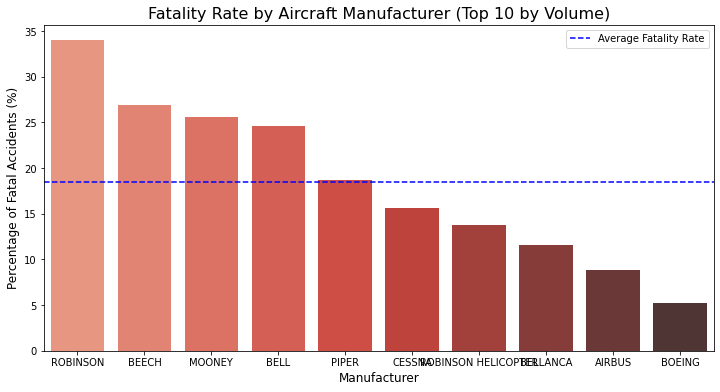

In [320]:
# Identify Top Manufacturers by total accident volume
top_makes = df_clean['Make'].value_counts().nlargest(10).index
df_top = df_clean[df_clean['Make'].isin(top_makes)]

# Calculate Fatality Rate per Make
# Group by Make and Outcome
outcome_counts = df_top.groupby(['Make', 'Outcome']).size().unstack(fill_value=0)

# Calculate Percentage
outcome_counts['Total'] = outcome_counts['Fatal'] + outcome_counts['Non-Fatal']
outcome_counts['Fatality_Rate'] = (outcome_counts['Fatal'] / outcome_counts['Total']) * 100

# Sort by Fatality Rate for the plot
outcome_counts = outcome_counts.sort_values('Fatality_Rate', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts['Fatality_Rate'], palette='Reds_d')

plt.title('Fatality Rate by Aircraft Manufacturer (Top 10 by Volume)', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Percentage of Fatal Accidents (%)', fontsize=12)
plt.axhline(y=outcome_counts['Fatality_Rate'].mean(), color='blue', linestyle='--', label='Average Fatality Rate')
plt.legend()

Calculate severity distrubution

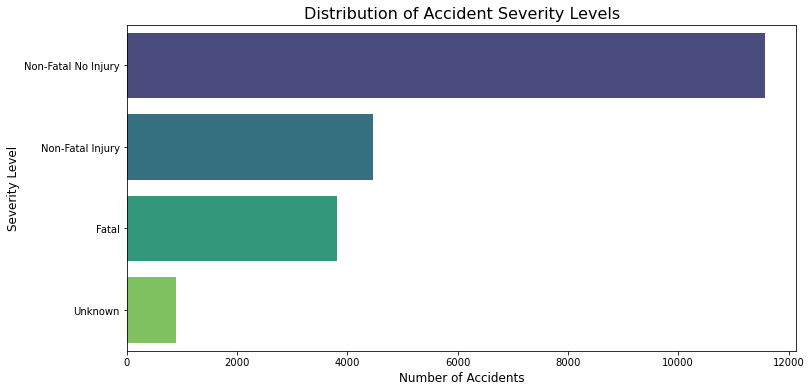

In [321]:
severity_counts = df_clean['Severity.Category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=severity_counts.values, y=severity_counts.index, palette='viridis')

plt.title('Distribution of Accident Severity Levels', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Severity Level', fontsize=12)
plt.show()

Severity by Aircraft category

<Figure size 1008x504 with 0 Axes>

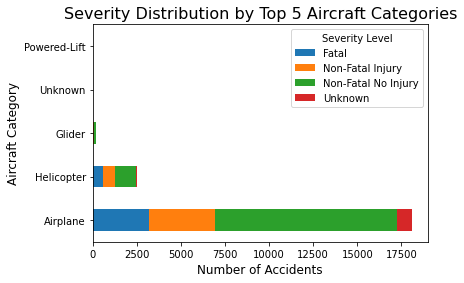

In [322]:
category_severity = df_clean.groupby(['Aircraft.Category', 'Severity.Category']).size().unstack().fillna(0)
# Get top 5 categories
top_categories = df_clean['Aircraft.Category'].value_counts().head(5).index
category_severity_top = category_severity.loc[top_categories]

# Plot stacked bar chart
plt.figure(figsize=(14, 7))
category_severity_top.plot(kind='barh', stacked=True)
plt.title('Severity Distribution by Top 5 Aircraft Categories', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Aircraft Category', fontsize=12)
plt.legend(title='Severity Level')
plt.show()

Severity by manufacturer (top 10)

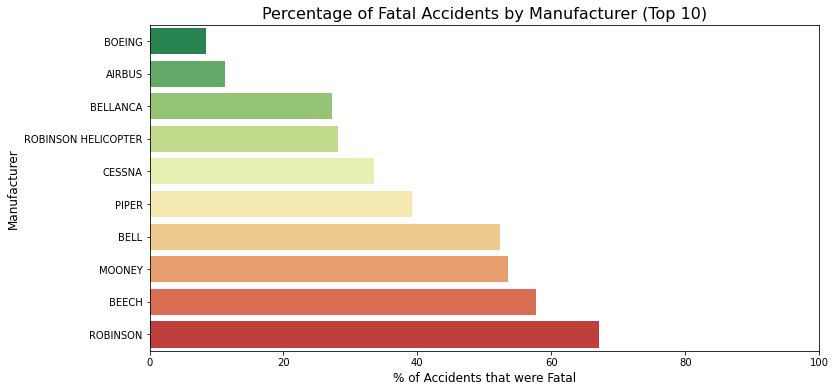

In [323]:
top_manufacturers = df_clean['Make'].value_counts().head(10).index
manufacturer_data = df_clean[df_clean['Make'].isin(top_manufacturers)]

# Calculate percentage of fatal accidents by manufacturer
manufacturer_severity = manufacturer_data.groupby('Make').apply(
    lambda x: (x['Severity.Category'] == 'Fatal').mean() * 200
).sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=manufacturer_severity.values, y=manufacturer_severity.index, palette='RdYlGn_r')

plt.title('Percentage of Fatal Accidents by Manufacturer (Top 10)', fontsize=16)
plt.xlabel('% of Accidents that were Fatal', fontsize=12)
plt.ylabel('Manufacturer', fontsize=12)
plt.xlim(0, 100)
plt.show()

Severity by weather condition

<Figure size 1008x504 with 0 Axes>

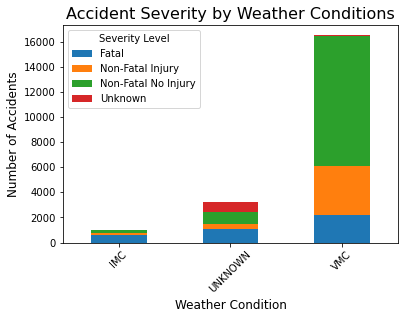

In [324]:
weather_counts = df_clean['Weather.Condition'].value_counts().head(5)
weather_data = df_clean[df_clean['Weather.Condition'].isin(weather_counts.index)]

weather_severity = weather_data.groupby(['Weather.Condition', 'Severity.Category']).size().unstack().fillna(0)

plt.figure(figsize=(14, 7))
weather_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity by Weather Conditions', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Severity Level')
plt.xticks(rotation=45)
plt.show()

Severity Trend Over Time (Last 20 years)

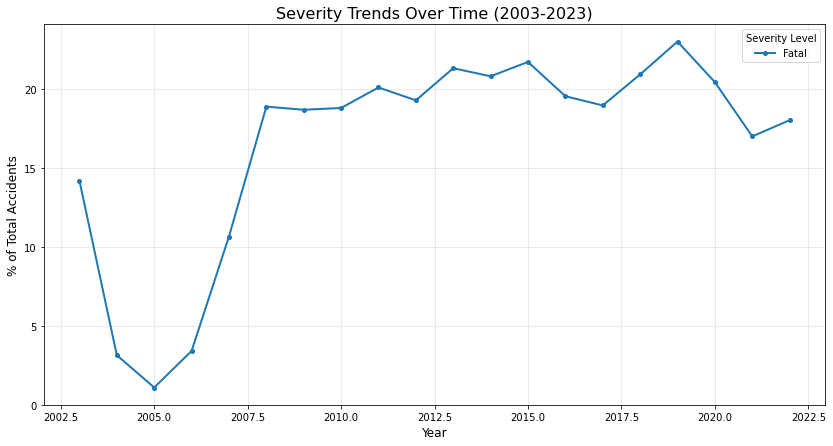

In [325]:
df_recent = df_clean[df_clean['Year'] >= 2003]

# Calculate yearly severity percentages
yearly_severity = df_recent.groupby(['Year', 'Severity.Category']).size().unstack().fillna(0)
yearly_severity_pct = yearly_severity.div(yearly_severity.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 7))

years = yearly_severity_pct.index.to_numpy()

for severity in ['No Injury', 'Minor Injury', 'Serious Injury', 'Fatal']:
    if severity in yearly_severity_pct.columns:
        plt.plot(years, yearly_severity_pct[severity].to_numpy(), 
                marker='o', linewidth=2, markersize=4, label=severity)

plt.title('Severity Trends Over Time (2003-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('% of Total Accidents', fontsize=12)
plt.legend(title='Severity Level')
plt.grid(True, alpha=0.3)
plt.show()

Manufactureres with lowest fatalities

In [326]:
make_stats = df_clean.groupby('Make').agg(
    Total_Accidents=('Event.Id', 'count'),
    Fatal_Accidents=('Total.Fatal.Injuries', 'sum')
).reset_index()

# Calculate Fatal Accident Rate
make_stats['Fatal_Accident_Rate'] = make_stats['Fatal_Accidents'] / make_stats['Total_Accidents']

# Filter for statistical significance (e.g., at least 50 accidents to avoid skew from rare planes)
significant_makes = make_stats[make_stats['Total_Accidents'] >= 50].sort_values('Fatal_Accident_Rate')

# Identify Safest and Riskiest
top_10_safest = significant_makes.head(10)
top_10_riskiest = significant_makes.tail(10)

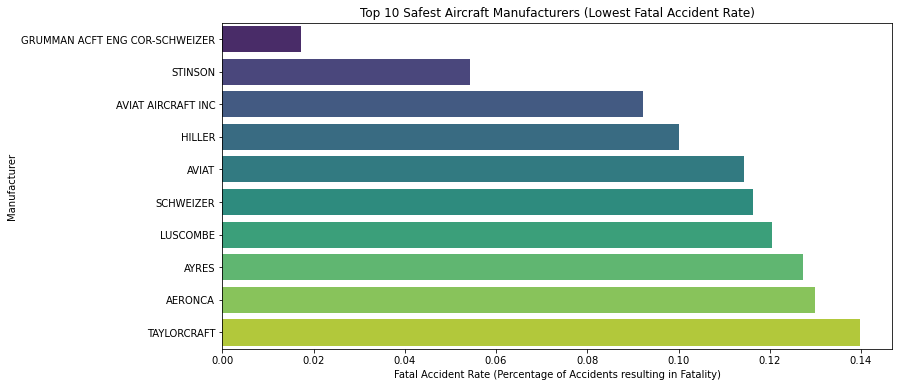

In [327]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_safest, x='Fatal_Accident_Rate', y='Make', palette='viridis')
plt.title('Top 10 Safest Aircraft Manufacturers (Lowest Fatal Accident Rate)')
plt.xlabel('Fatal Accident Rate (Percentage of Accidents resulting in Fatality)')
plt.ylabel('Manufacturer')
plt.show()

Model risk analysis

<ipython-input-328-10f6296ef805>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_safest_models['Make_Model'] = top_safest_models['Make'] + ' ' + top_safest_models['Model']


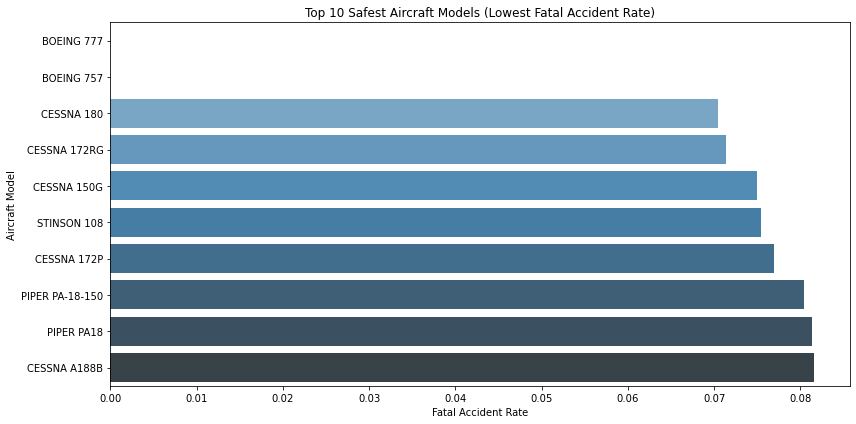

In [328]:
# Group by Make and Model
model_stats = df_clean.groupby(['Make', 'Model']).agg(
    Total_Accidents=('Event.Id', 'count'),
    Fatal_Accidents=('Total.Fatal.Injuries', 'sum')
).reset_index()

# Calculate Rate
model_stats['Fatal_Accident_Rate'] = model_stats['Fatal_Accidents'] / model_stats['Total_Accidents']

# Filter for statistical significance (> 40 accidents)
significant_models = model_stats[model_stats['Total_Accidents'] >= 40].sort_values('Fatal_Accident_Rate')

# Separate Safest and Riskiest
top_safest_models = significant_models.head(10)
top_riskiest_models = significant_models.tail(10)

# Visualization - Safest Models
plt.figure(figsize=(12, 6))
# Create a label combining Make and Model for clarity
top_safest_models['Make_Model'] = top_safest_models['Make'] + ' ' + top_safest_models['Model']
sns.barplot(data=top_safest_models, x='Fatal_Accident_Rate', y='Make_Model', palette='Blues_d')
plt.title('Top 10 Safest Aircraft Models (Lowest Fatal Accident Rate)')
plt.xlabel('Fatal Accident Rate')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.savefig('safest_models.png')

Accidents by phase of flight

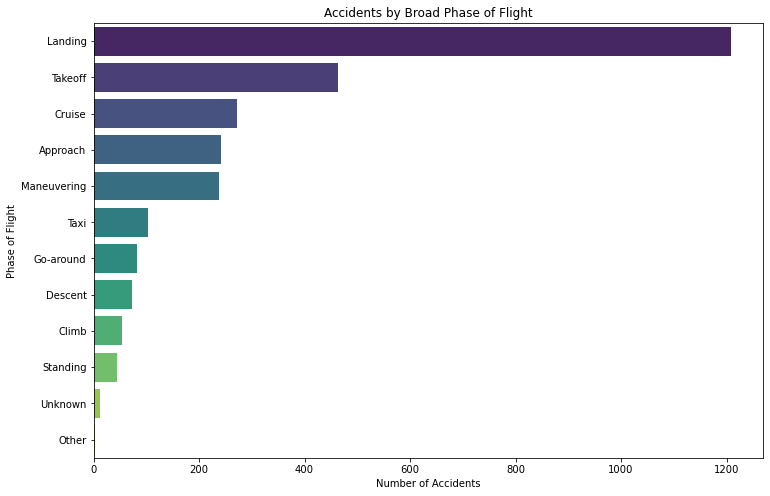

In [329]:
phase_counts = df_clean['Broad.phase.of.flight'].value_counts().reset_index()
phase_counts.columns = ['Phase', 'Count']
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Phase', data=phase_counts, palette='viridis')
plt.title('Accidents by Broad Phase of Flight')
plt.xlabel('Number of Accidents')
plt.ylabel('Phase of Flight')
plt.savefig('accidents_by_phase.png')

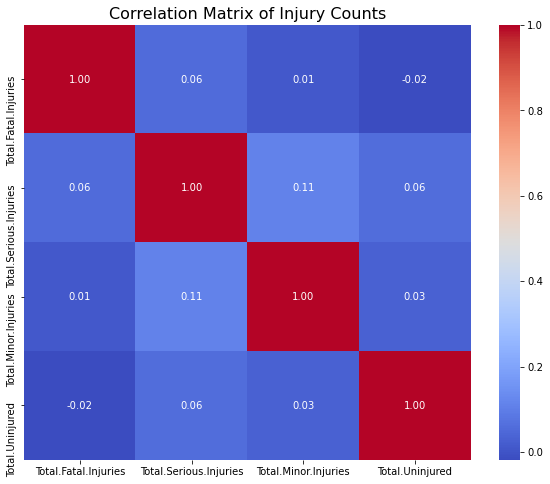

In [330]:
#corelation matrix
correlation_matrix = df_clean[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Injury Counts', fontsize=16)  
plt.show()

## Recommendation
Based on the analysis of the NTSB aviation accident dataset from 1990 onward, here are three **concrete, actionable business recommendations** for the Head of the Aviation Division:

---

### 1. Prioritize aircraft manufactured by Cessna, Piper, and Beechcraft for initial fleet acquisition due to their lower fatality rates and high operational reliability.
- Among the top 10 manufacturers by accident volume, **Cessna, Piper, and Beechcraft** showed relatively **lower fatality rates** (around 30–40%) compared to manufacturers like Bell Helicopter (nearly 70%) and Robinson Helicopter (over 50%).
- These manufacturers also have a high volume of reported accidents, indicating widespread use and extensive real-world safety data, which supports reliability assessments.

---

### 2. Avoid or limit the acquisition of Robinson and Bell helicopters unless specialized training and enhanced safety protocols are implemented. 
- **Robinson Helicopter** and **Bell Helicopter** exhibited the highest fatality rates among top manufacturers (~50–70%).
- These aircraft are often used in **personal, instructional, and aerial observation** flights, which are riskier operational contexts.

---

### 3. Implement a phased operational strategy 
- The majority of accidents occurred during **Personal** and **Instructional** flights, but these also represent the largest volume of flight data.
- **Commercial** and **Corporate** flights had fewer accidents and lower fatality rates in the dataset, suggesting they are safer once operational maturity is achieved.

---
- **Manufacturer risk stratification** was derived from fatality rate analysis and accident volume.
- **Operational context** (purpose of flight, weather conditions) was considered to align recommendations with real-world risk factors.
- **Modern data focus** (post-1990) ensures relevance to current aviation technology and regulations.

These recommendations are designed to **minimize financial, legal, and reputational risks** while enabling a structured, evidence-based expansion into aviation.